* Name: Noppol Anakplurk
* ID: 6410422009
* NickName: pobb
* Rank: 19

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003/train.csv
/kaggle/input/dads6003/test.csv


**1. Data Exploratory**

In [2]:
df = pd.read_csv('/kaggle/input/dads6003/train.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

**2. StandardScaler**
- Result => no effect

In [4]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1:].to_numpy()

df1 = StandardScaler().fit_transform(X=X,y=y)
df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.418024,0.697361,0.908244,0.860010,1.438017,0.105422,-1.410520,0.300242,2.424030,0.906641,1.187125,-1.576254,-0.450771,-1.636069,-0.990166,0.298134,0.360340,-0.034138,-1.175474,0.438064
1,1.208249,0.588966,1.157820,-0.055628,1.019221,-0.620275,1.664147,-0.169252,0.073392,0.429405,0.222412,1.288718,0.766910,0.140725,0.552558,-0.308297,-0.183930,0.149262,-1.866067,0.660398
2,-1.351928,-0.487429,-0.043178,0.165635,0.567501,0.663952,-0.404490,0.067338,-0.909673,-0.745591,0.220894,0.701644,0.389427,0.497449,0.072630,-1.025689,-0.129207,-0.197500,-2.072498,-0.316290
3,-0.629640,-0.038412,0.102930,1.285736,-0.872008,0.348461,0.049050,-0.325368,-0.000458,-1.194144,0.114946,-0.938142,NaN,-0.049025,0.633290,1.477569,0.230494,-0.963919,1.121095,-0.197222
4,1.154408,-1.431418,-0.423426,1.195340,0.525734,-0.453405,0.663076,-0.244370,0.379870,1.191922,0.553286,0.771922,1.183897,-1.753098,-0.075825,1.469592,0.056169,1.313620,-0.233921,0.124238


**3. Re-sampling**

In [5]:
df_majority = df[(df['y']==0)]
df_majority.shape

(5605, 21)

In [6]:
df_minority = df[(df['y']==1)]
df_minority.shape

(1895, 21)

In [7]:
# upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True, # sample with replacement
                                 n_samples=df_majority.shape[0], # to match majority class
                                 random_state=35)


df_minority_upsampled.head()
print(df_minority_upsampled.shape)

(5605, 21)


In [8]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


df_upsampled.head()
print(df_upsampled.shape)

(11210, 21)


In [9]:
#check result
df_upsampled["y"].value_counts()

1    5605
0    5605
Name: y, dtype: int64

In [10]:
df = df_upsampled

**4. Data splitting**

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:].squeeze()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35) #20%
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8968, 20), (8968,), (2242, 20), (2242,))

**5. Data distribution**

<AxesSubplot:ylabel='y'>

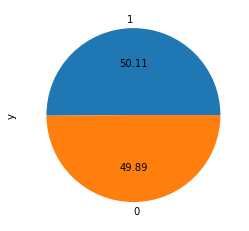

In [13]:
y_train.value_counts().plot.pie(autopct='%.2f') #Training data

In [14]:
y_train.value_counts()

1    4494
0    4474
Name: y, dtype: int64

**6. Tuning Hyperparameter**

> default rate
- learning_rate=0.1
- max_iter=100

In [15]:
from sklearn.model_selection import GridSearchCV


#Preparation
learning_rate_range = np.arange(0.010,0.155,0.005)
max_iter_range = np.arange(10,360,10)
parameter_grid = dict(learning_rate = learning_rate_range, max_iter = max_iter_range)

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import make_scorer,f1_score
hgc = HistGradientBoostingClassifier()

grid = GridSearchCV(estimator=hgc,
                    param_grid=parameter_grid,
                    scoring=make_scorer(f1_score,average="weighted"),
                    n_jobs=2,
                    cv=5
                   )

In [16]:
#train
#grid.fit(X_train, y_train)


#Result
#The best parameters are {'learning_rate': 0.12999999999999998, 'max_iter': 260} with a score of 0.9899635076

grid.best_params_ = {'learning_rate': 0.12999999999999998, 'max_iter': 260}
learning_rate_act = grid.best_params_['learning_rate']
max_iter_act = grid.best_params_['max_iter']

print(learning_rate_act)
print(max_iter_act)

0.12999999999999998
260


**7. Building model - HistGradientBoostingClassifier**
* ensemble method to handle imbalanced data
* HistGradientBoosting to handle null items
* not required std scale

In [17]:
# Training Models
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(random_state=35, learning_rate= learning_rate_act, max_iter=max_iter_act)
model.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.12999999999999998, max_iter=260,
                               random_state=35)

In [18]:
# Make prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
# Cross-validation Models
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer,f1_score, matthews_corrcoef

model_cv = HistGradientBoostingClassifier(random_state=35, learning_rate= learning_rate_act, max_iter=max_iter_act)
cv = cross_val_score(model_cv, X_train, y_train, cv=5, scoring=make_scorer(f1_score,average="weighted"))

**8. Performance results (Train,CV,Test)**

In [20]:
f1_cv = cv.mean()
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")

#display
name = ["Train_set", "CV_set", "Test_set"]
value = [f1_train, f1_cv, f1_test]
df = pd.DataFrame(list(zip(name, value)),
                  columns =['Name', 'f1_score']
                 )
df

,Name,f1_score
0,Train_set,1.000000
1,CV_set,0.989964
2,Test_set,0.991526


**9. Submit unseen data**

In [21]:
df = pd.read_csv('/kaggle/input/dads6003/test.csv')
y_ = model.predict(df)

df_s = pd.DataFrame()
id = list(range(1,2501))
predict = y_
df_s['id']=pd.Series(id)
df_s['Expected']=pd.Series(predict)

df_s.to_csv('submit_Hist_resampling_0.99_v2.csv', index=False)